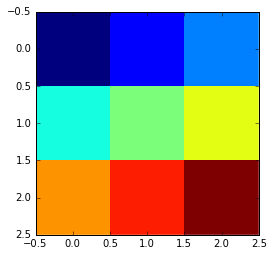

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
img = [[1,2,3],[4,5,6],[7,8,9]]
plt.imshow(img,interpolation='none')

In [2]:
from prior_box_sizes import VGGDef, projectRF

layerNo = -5
x = 0
y = 0
boxes, layers = projectRF(layerNo, x, y)
for idx, box in enumerate(boxes):
    print 'layer={} receptiveField={} absoluteStride={} blob={} corners={} padding={}'.format(box['name'], box['receptiveField'], box['absoluteStride'], box['blobSize'], box['corners'], VGGDef[idx][2])


layer=data receptiveField=1 absoluteStride=1 blob=300 corners=[(0, 0), (229, 0), (229, 229), (0, 229)] padding=1
layer=conv1_1 receptiveField=3 absoluteStride=1 blob=300 corners=[(0, 0), (228, 0), (228, 228), (0, 228)] padding=1
layer=conv1_2 receptiveField=5 absoluteStride=1 blob=300 corners=[(0, 0), (227, 0), (227, 227), (0, 227)] padding=0
layer=pool1 receptiveField=6 absoluteStride=2 blob=150 corners=[(0, 0), (113, 0), (113, 113), (0, 113)] padding=1
layer=conv2_1 receptiveField=10 absoluteStride=2 blob=150 corners=[(0, 0), (112, 0), (112, 112), (0, 112)] padding=1
layer=conv2_2 receptiveField=14 absoluteStride=2 blob=150 corners=[(0, 0), (111, 0), (111, 111), (0, 111)] padding=0
layer=pool2 receptiveField=16 absoluteStride=4 blob=75 corners=[(0, 0), (55, 0), (55, 55), (0, 55)] padding=1
layer=conv3_1 receptiveField=24 absoluteStride=4 blob=75 corners=[(0, 0), (54, 0), (54, 54), (0, 54)] padding=1
layer=conv3_2 receptiveField=32 absoluteStride=4 blob=75 corners=[(0, 0), (53, 0), (5

layer=pool6 corners on input=[(0, 0), (299, 0), (299, 299), (0, 299)]
layer=conv8_2 corners on input=[(0, 0), (299, 0), (299, 299), (0, 299)]
layer=conv8_1 corners on input=[(0, 0), (261, 0), (261, 261), (0, 261)]
layer=conv7_2 corners on input=[(0, 0), (261, 0), (261, 261), (0, 261)]
layer=conv7_1 corners on input=[(0, 0), (229, 0), (229, 229), (0, 229)]
layer=conv6_2 corners on input=[(0, 0), (229, 0), (229, 229), (0, 229)]
layer=conv6_1 corners on input=[(0, 0), (213, 0), (213, 213), (0, 213)]
layer=fc7 corners on input=[(0, 0), (213, 0), (213, 213), (0, 213)]
layer=fc6 corners on input=[(0, 0), (213, 0), (213, 213), (0, 213)]
layer=pool5 corners on input=[(0, 0), (117, 0), (117, 117), (0, 117)]
layer=conv5_3 corners on input=[(0, 0), (101, 0), (101, 101), (0, 101)]
layer=conv5_2 corners on input=[(0, 0), (85, 0), (85, 85), (0, 85)]
layer=conv5_1 corners on input=[(0, 0), (69, 0), (69, 69), (0, 69)]
layer=pool4 corners on input=[(0, 0), (53, 0), (53, 53), (0, 53)]
layer=conv4_3 corn

/home/jowos/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


layer=conv2_1 corners on input=[(0, 0), (5, 0), (5, 5), (0, 5)]
layer=pool1 corners on input=[(0, 0), (3, 0), (3, 3), (0, 3)]
layer=conv1_2 corners on input=[(0, 0), (2, 0), (2, 2), (0, 2)]
layer=conv1_1 corners on input=[(0, 0), (1, 0), (1, 1), (0, 1)]
layer=data corners on input=[(0, 0), (0, 0), (0, 0), (0, 0)]


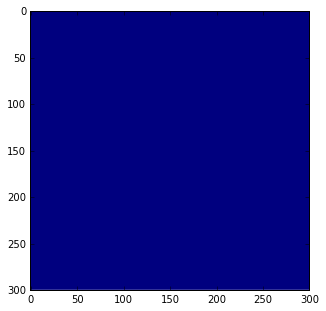

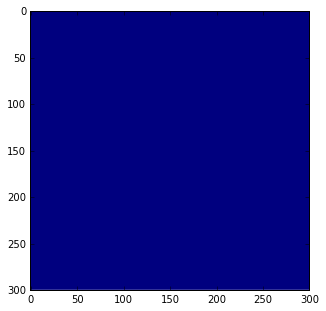

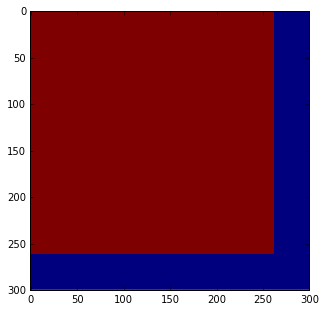

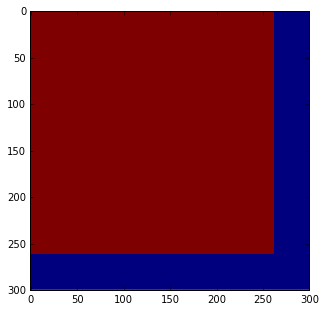

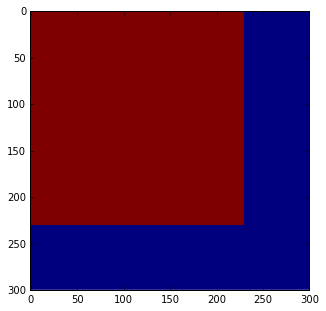

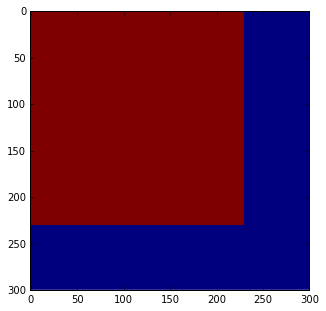

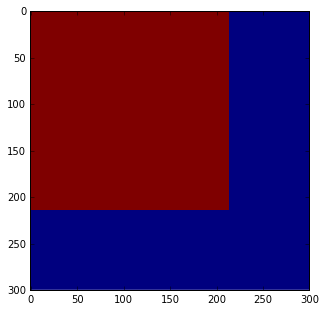

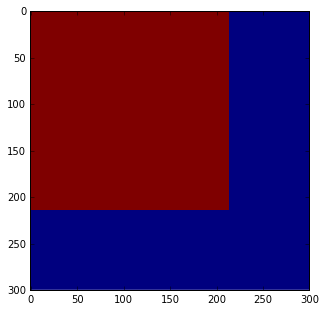

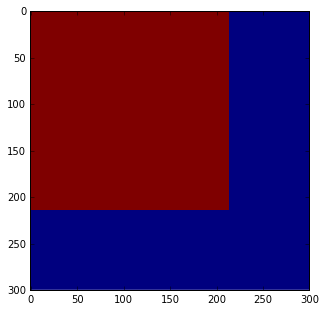

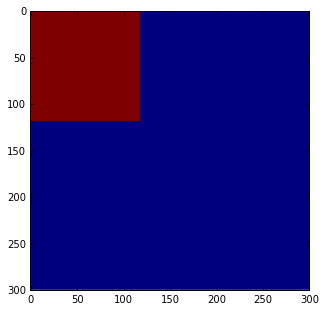

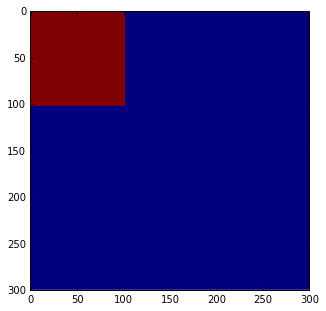

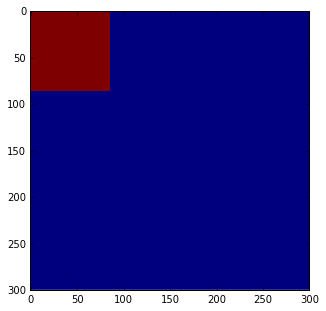

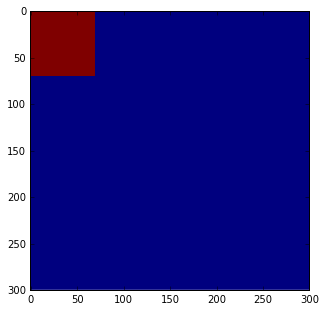

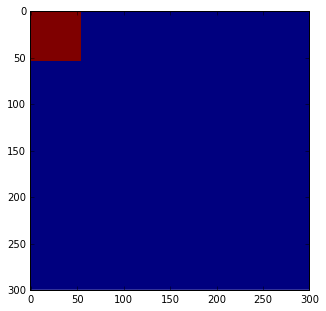

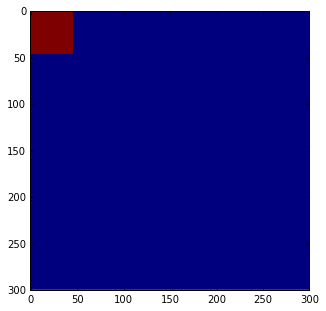

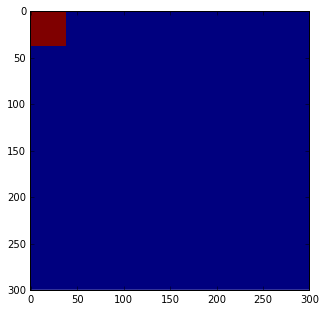

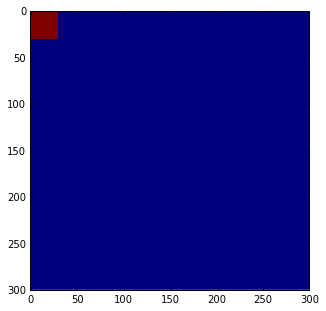

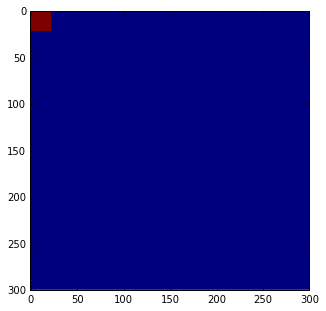

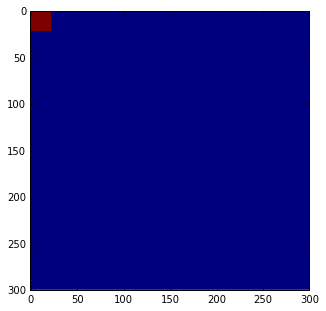

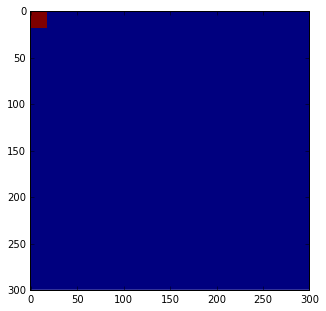

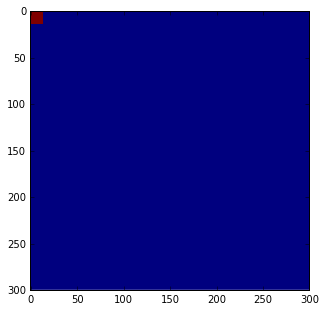

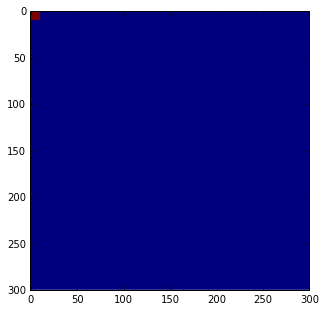

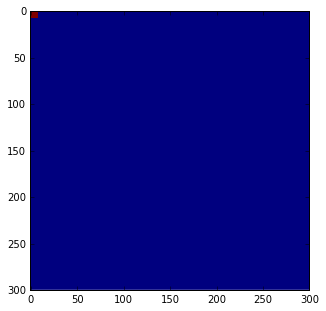

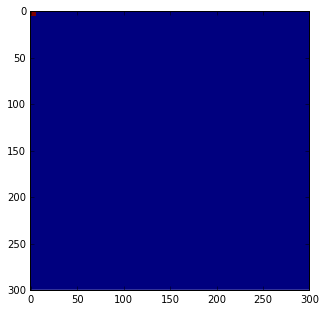

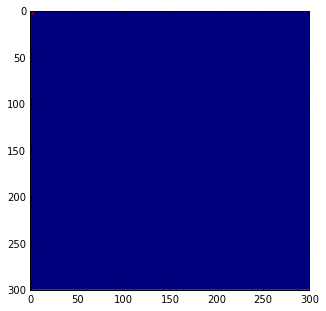

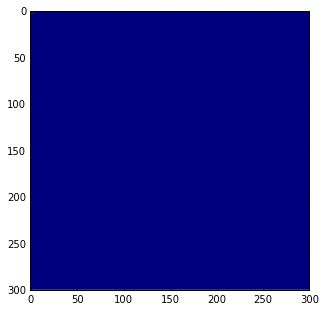

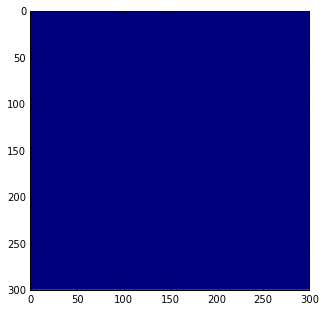

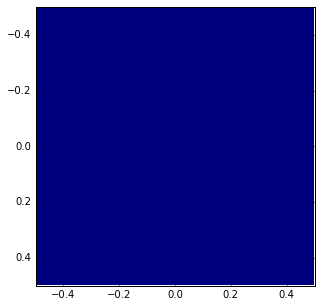

In [3]:
def plotBlob(blobSize, xmin, xmax, ymin, ymax):
    img = [[0 for x in xrange(blobSize)] for y in xrange(blobSize)]
    for x in range(xmin, xmax+1):
        for y in range(ymin, ymax+1):
            img[y][x] = 1
    fig = plt.figure(figsize=(5,5))
    #ax = fig.gca()
    #ax.set_xticks(np.arange(-.5,blobSize-.5,1), minor=True)
    #ax.set_yticks(np.arange(-.5,blobSize-.5,1), minor=True)
    #plt.axis([0, blobSize, 0, blobSize])
    #plt.grid(which='minor', linestyle="-", color='w')
    plt.imshow(img, interpolation='none')
    #plt.close(fig)
    
layerNo = len(VGGDef)
x = 0
y = 0
while layerNo >= 0:
    boxes, layers = projectRF(layerNo, x, y)
    name = boxes[-1]['name']
    box = boxes[0]
    print 'layer={} corners on input={}'.format(name, box['corners'])
    plotBlob(box['blobSize'], box['corners'][0][0], box['corners'][2][0], box['corners'][0][1], box['corners'][2][1])
    layerNo -= 1